In [1]:
import tensorflow as ts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


C:\Users\kunal\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kunal\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kunal\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kunal\AppData\Roaming\Python\Python36\site-

In [2]:
from tensorflow.keras.models import Sequential,Model


In [3]:
from tensorflow.keras.layers import Dense,Input,Dropout,Conv2D,Flatten
from tensorflow.keras.layers import BatchNormalization,MaxPool2D,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [4]:
from IPython.display import SVG,Image
import cv2

In [5]:
import livelossplot

In [6]:
from livelossplot.tf_keras import PlotLossesCallback

In [5]:
print(ts.__version__)

1.14.0


In [6]:
cd train

C:\Users\kunal\Facial\train


In [120]:
df_test=pd.read_csv('test\\test.csv')

In [7]:
df=pd.read_csv('..\\train\\train.csv')

In [8]:
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [9]:
len(df)

28709

In [10]:
fst_Img=df.loc[0,"pixels"]

In [11]:
fst_Img=list(fst_Img.split(" "))

In [12]:
len(fst_Img)

2304

In [13]:
fst_Img=np.array(fst_Img,dtype=np.int16)

In [14]:
fst_Img=fst_Img.reshape(48,48)

In [15]:
fst_Img.shape

(48, 48)

In [16]:
type(fst_Img)

numpy.ndarray

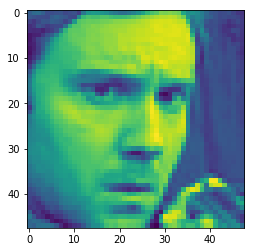

In [17]:
plt.imshow(fst_Img)

In [18]:
df['pixels_new']=df['pixels'].apply(lambda x: list(x.split(" ")))

In [19]:
df['pixels_new'].head()

0    [70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...
1    [151, 150, 147, 155, 148, 133, 111, 140, 170, ...
2    [231, 212, 156, 164, 174, 138, 161, 173, 182, ...
3    [24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...
4    [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...
Name: pixels_new, dtype: object

In [20]:
df['pixels_len']=df['pixels_new'].apply(len)

In [21]:
df['pixels_len'].value_counts()

2304    28709
Name: pixels_len, dtype: int64

In [22]:
df['pixels_new']=df['pixels_new'].apply(lambda x: np.array(x,dtype=np.int16))

In [23]:
df.to_csv("train_chckd.csv",index=False)

In [24]:
df['pixels_new']=df['pixels_new'].apply(lambda x: x.reshape(48,48))

In [25]:
df.loc[1,"pixels_new"].shape

(48, 48)

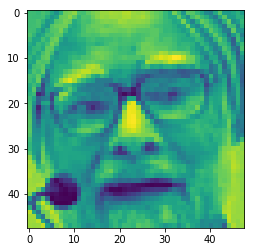

In [26]:
plt.imshow(df.loc[1,"pixels_new"])

In [27]:
df.drop('pixels_len',axis=1,inplace=True)

In [28]:
#df=pd.read_csv('train_chckd.csv')

In [29]:
df.columns

Index(['emotion', 'pixels', 'pixels_new'], dtype='object')

In [30]:
df['pixels_new'].loc[0]

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]], dtype=int16)

In [31]:
df['emotion'].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

In [32]:
cd ..

C:\Users\kunal\Facial


In [33]:
print(os.listdir("."))

['.ipynb_checkpoints', 'example_submission.csv', 'Face Detection Prog.ipynb', 'fer2013', 'fer2013.tar.gz', 'icml_face_data.csv', 'icml_face_data.csv.zip', 'test', 'test.csv.zip', 'train', 'train.csv (1).zip']


In [34]:
df.to_pickle("./TrainDataframe.pkl")

In [7]:
chk_data=pd.read_pickle("./TrainDataframe.pkl")

In [6]:
chk_data['pixels_new'].shape

(28709,)

# Convert to train and validation dataframe

In [8]:
from sklearn.cross_validation import train_test_split

X_ttrain,X_test,y_ttrain,y_test=train_test_split(chk_data['pixels_new'],chk_data['emotion'],test_size=0.33, random_state=42)

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
#batch_size=64
X_test.shape[0]+X_ttrain.shape[0]


28709

6

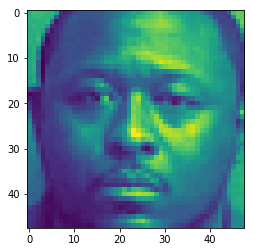

In [10]:
####Testing####

plt.imshow(X_test.loc[4974])
y_test.loc[4974]

In [11]:
X_ttrain.reset_index(drop=True,inplace=True)
y_ttrain.reset_index(drop=True,inplace=True)

In [12]:
X_images_array=np.zeros(shape=(len(X_ttrain),48,48))

In [13]:
for i in range(len(X_ttrain)):
    X_images_array[i]=X_ttrain.loc[i]

In [14]:
X_ttrain=np.expand_dims(X_images_array,axis=-1)

In [15]:
y_ttrain=np.array(y_ttrain)

In [16]:
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [17]:
X_images_test_array=np.zeros(shape=(len(X_test),48,48))

In [18]:
for i in range(len(X_test)):
    X_images_test_array[i]=X_test.loc[i]

In [19]:
X_test=np.expand_dims(X_images_test_array,axis=-1)

In [20]:
y_test=np.array(y_test)

In [21]:
X_test.shape

(9474, 48, 48, 1)

In [ ]:
#Test over

In [48]:
images_array=np.zeros(shape=(len(chk_data['pixels_new']),48,48))

In [52]:
for i in range(len(chk_data['pixels_new'])):
    images_array[i]=chk_data['pixels_new'].loc[i]

In [53]:
images_array.shape

(28709, 48, 48)

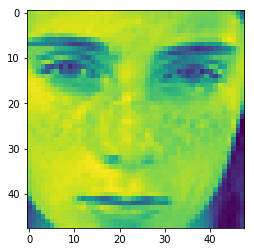

In [55]:
plt.imshow(images_array[28708])

In [56]:
X_train=np.expand_dims(images_array,axis=-1)

In [57]:
X_train.shape

(28709, 48, 48, 1)

In [58]:
y_train=np.array(chk_data['emotion'])

In [59]:
y_train.shape

(28709,)

# Test Data

In [121]:
df_test.columns

Index(['pixels'], dtype='object')

In [123]:
df_test['pixels_new']=df_test['pixels'].apply(lambda x: np.array(list(x.split(" ")),dtype=np.int16).reshape(48,48))

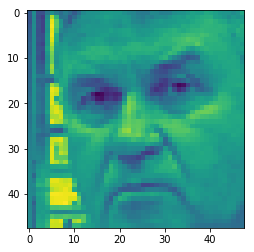

In [126]:
plt.imshow(df_test['pixels_new'].loc[2])

# Data Generator

In [22]:
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow(x=X_ttrain,y=y_ttrain,batch_size=batch_size,shuffle=True)
#Use Flowfromdirectory if data is stored in individual label folders 


datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_validation.flow(x=X_test,y=y_test,batch_size=batch_size,shuffle=True)


(64, 48, 48, 1)
(64, 48, 48, 1)
(64, 48, 48, 1)
(64, 48, 48, 1)
(64, 48, 48, 1)
(64, 48, 48, 1)


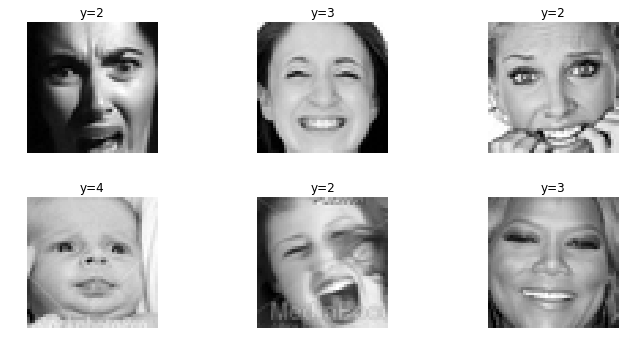

In [23]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in train_generator:
        print(x.shape)
        plt.imshow((x[0]/255).reshape(48,48),cmap='gray')
        plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

(64, 48, 48, 1)
(64, 48, 48, 1)
(64, 48, 48, 1)
(64, 48, 48, 1)
(64, 48, 48, 1)
(64, 48, 48, 1)


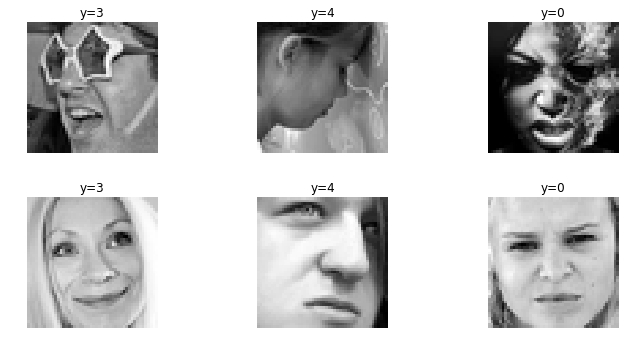

In [24]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in validation_generator:
        print(x.shape)
        plt.imshow((x[0]/255).reshape(48,48),cmap='gray')
        plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

In [99]:
myModel=cv2.imread('ExactModel.PNG')

In [88]:
type(myModel)

numpy.ndarray

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

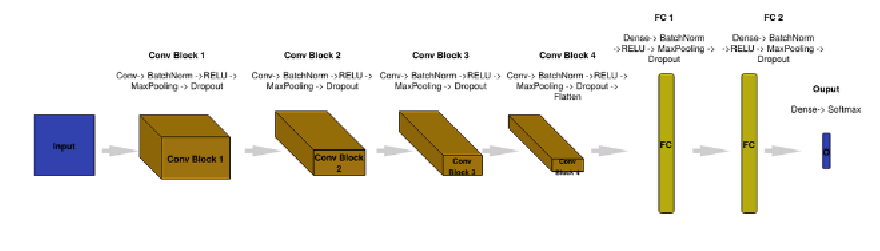

In [100]:
plt.figure(figsize=(15,10))
plt.imshow(myModel)
plt.axis('off')
plt.tight_layout

In [25]:
model=Sequential()
#1 conv
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))#Dont loose info of image
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))#Reduce h and w by a factor of 2
model.add(Dropout(0.25))#To Prevent overfitting of data

#2 conv
model.add(Conv2D(128,(5,5),padding='same'))#Increase no. of filters
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))#2
model.add(Dropout(0.25))

#3 conv
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))#3
model.add(Dropout(0.25))

#4 conv

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))#4
model.add(Dropout(0.25))

model.add(Flatten())#Flattening b4 fully connected layer

#FC 1
model.add(Dense(256))#Fully Connected Layer
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))#To Prevent overfitting of data

#FC 2
model.add(Dense(512))#Fully Connected Layer
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))#To Prevent overfitting of data

#Last O/p Layer
model.add(Dense(7,activation='softmax'))#7 O/p

opt=Adam(learning_rate=0.0005)

model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [33]:
#LOAD previous saved weights

model.load_weights('model_weights.h5')


In [29]:
a=model.get_weights()

In [30]:
a

[array([[[[-2.22298689e-02,  1.32288532e-02,  7.53979608e-02,
            9.75183919e-02, -7.80411214e-02, -7.17852265e-03,
            6.36759251e-02,  7.95502365e-02, -8.10355842e-02,
            3.16116102e-02,  8.51917919e-03, -3.53337601e-02,
           -6.21637655e-03,  1.08539509e-02,  9.44022164e-02,
           -1.03015363e-01,  9.62918177e-02,  6.26444146e-02,
            7.78233781e-02,  1.06768645e-01, -7.28711411e-02,
            8.21244270e-02,  5.42974984e-03,  4.26882766e-02,
            9.10518318e-02,  7.81887397e-02, -6.27859607e-02,
           -1.29301390e-02,  8.73564631e-02,  6.57146573e-02,
           -4.60484251e-02, -1.65419448e-02,  6.45769611e-02,
           -1.23706302e-02,  6.55346438e-02,  7.49164820e-02,
           -5.18665742e-03, -1.69818532e-02, -1.31176440e-02,
            1.01836167e-01,  4.77369688e-02, -4.26048897e-02,
            4.47667763e-02,  5.53785311e-03, -6.37789741e-02,
           -3.97430807e-02,  4.99775745e-02, -4.01770137e-02,
        

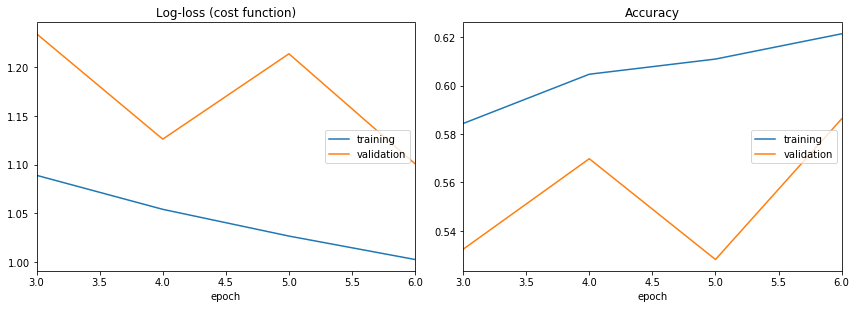

Log-loss (cost function):
training   (min:    1.003, max:    1.150, cur:    1.003)
validation (min:    1.101, max:    1.327, cur:    1.101)

Accuracy:
training   (min:    0.562, max:    0.621, cur:    0.621)
validation (min:    0.483, max:    0.586, cur:    0.586)

Epoch 00006: saving model to model_weights.h5
300/300 [==============================] - 1301s 4s/step - loss: 1.0028 - acc: 0.6214 - val_loss: 1.1008 - val_acc: 0.5863


In [35]:
#epochs=15
#Changing epochs from 15 to 6 as 9 epochs were already done and the leart wts are loaded on previous cell
epochs=6

steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint("model_weights.h5",monitor="val_accuracy",save_weights_only=True,mode='max',verbose=1)  
#checkpoint callback, best validation accuracy weights are saved, wts with maximum(mode) validation accuracy


redduce_lr=ReduceLROnPlateau(monitor="val_loss",factor=0.1,patience=2,mode='auto',min_lr=0.0001)
#Another call back, Reduce a learning rate when observe a plateau in val loss.
#if we dont find improvement in val loss then reduce learning rate, reduce lr by factor 1, do after min 2 epochs, min lr = 0.0001


callbacks=[PlotLossesCallback(),checkpoint,redduce_lr]

#I can use model.history to see the exact val and accuracy curve after fitting/returning whole model
#  but here I wil use another library for live graphs which is shown while fitting(shows real time info within notebook)(No tensorboard needed)


history=model.fit(x=train_generator,steps_per_epoch=steps_per_epoch,callbacks=callbacks,
                  epochs=epochs,validation_steps=validation_steps,
                  validation_data=validation_generator)

In [36]:
#Can increase the accuracy by training for longer and using more augmented images

In [38]:
model_json=model.to_json()
with open('model_json','w') as joson_file:
    joson_file.write(model_json)

In [39]:
model_json

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 48, 48, 1], "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 0.001, "center": true, "scale": true, "beta_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "gamma_initializer": {"clas